# Creating and Handling a Partial Ancestral Graph (PAG)

First, let's import the PAG class and edge-mark types. In a PAG, three edge-mark types exist:
1. Arrow head ...---> X
2. Tail ...---- X
3. Circle, a variant edge-mark the represents 'head or tail' ...---o X


In [1]:
import sys
sys.path.append('..')

from graphical_models import PAG, arrow_head_types as Mark

For plotting the graph we need to import:

In [2]:
from plot_utils import draw_graph

## Creating a PAG
For creating a PAG  we need to first define a set of nodes. This set elements can any immutable object that returns a 1-3
length discriptive string when str(object) is called. Commonly numeric values or short strings are used.
In this example we in use short strings. The graph that we are creating is in Figure 2-(a) by Jaber et al. (2019).

In [3]:
nodes = {'X1', 'X2', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5'}

Next, we instantiate the PAG and set the graph edges.

In [4]:
pag = PAG(nodes)
pag.add_edge('X1', 'X2', Mark.Directed, Mark.Directed)
pag.add_edge('X1', 'Y1', Mark.Tail, Mark.Directed)
pag.add_edge('X1', 'Y3', Mark.Directed, Mark.Directed)
pag.add_edge('X2', 'Y1', Mark.Directed, Mark.Directed)
pag.add_edge('X2', 'Y2', Mark.Tail, Mark.Directed)
pag.add_edge('Y1', 'Y5', Mark.Directed, Mark.Circle)
pag.add_edge('Y2', 'Y3', Mark.Directed, Mark.Directed)
pag.add_edge('Y3', 'Y4', Mark.Directed, Mark.Circle)
pag.add_edge('Y4', 'Y5', Mark.Circle, Mark.Circle)

## Calculating PAG Properties

In this example we find the visible edges (Richardon and Spirtes, 2002) and dc-components (Jaber et al., 2018)
of the PAG.

In [5]:
dc_components = pag.find_definite_c_components()  # dc-components
print(dc_components)

[{'Y3', 'X1', 'X2', 'Y2', 'Y1'}, {'Y5'}, {'Y4'}]


In [6]:
pag.find_visible_edges()  # find 'visible' edges
for edge in pag.visible_edges:
    print(str(edge[0]),'--->', str(edge[1]))

X2 ---> Y2
X1 ---> Y1


## Plotting a PAG

Finally, for plotting the PAG, rendering color-coded edges, we use the following method.

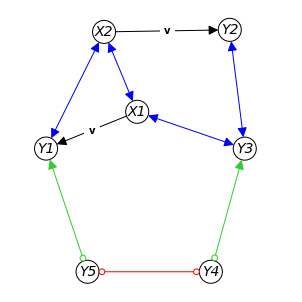

In [7]:
# Figure 1 (b)
fig = draw_graph(pag)

---
## References

* Jaber, Amin, Jiji Zhang, and Elias Bareinboim. "Causal identification under Markov equivalence: Completeness results."
In International Conference on Machine Learning, pp. 2981-2989. PMLR, 2019.
* Richardson, Thomas, and Peter Spirtes. "Ancestral graph Markov models."
The Annals of Statistics 30, no. 4 (2002): 962-1030.
* Jaber, Amin, Jiji Zhang, and Elias Bareinboim.
"A graphical criterion for effect identification in equivalence classes of causal diagrams."
In Proceedings of the Twenty-Seventh International Joint Conference on Artificial Intelligence. 2018.

